Brief about the Earthquake event terms/ variables:

* **depth**- Depth of the event in kilometers. The depth where the earthquake begins 
to rupture. This depth may be relative to the WGS84 geoid, mean sea-level, or the average elevation of the seismic stations which provided arrival-time data for the earthquake location.

* **depthError**- Uncertainty of reported depth of the event in kilometers.

* **dmin**- Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

* **gap**- The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties.

* **horizontalError**- Uncertainty of reported location of the event in kilometers.

* **id**- A unique identifier for the event. This is the current preferred id for the event, and may change over time. See the "ids" GeoJSON format property.

* **latitude**- Decimal degrees latitude. Negative values for southern latitudes.

* **locationSource**- The network that originally authored the reported location of this event.

* **longitude**- Decimal degrees longitude. Negative values for western longitudes.

* **mag**- The magnitude for the event. Earthquake magnitude is a measure of the size of an earthquake at its source.

* **magError**- Uncertainty of reported magnitude of the event.

* **magNst**- The total number of seismic stations used to calculate the magnitude for this earthquake.

* **magSource**- Network that originally authored the reported magnitude for this event.

* **magType**- The method or algorithm used to calculate the preferred magnitude for the event.

* **net**- The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

* **nst**- Number of seismic stations which reported P- and S-arrival times for this earthquake.

* **place**- Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name. If there is no nearby city within 300 kilometers (or if the nearby cities database is unavailable for some reason), the Flinn-Engdahl (F-E) seismic and geographical regionalization scheme is used.

* **rms**-The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data.

* **status**- Indicates whether the event has been reviewed by a human. Status is either automatic or reviewed. Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human. Reviewed events have been looked at by a human. The level of review can range from a quick validity check to a careful reanalysis of the event.

* **time**- Time when the event occurred. Times are reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z), and do not include leap seconds. In certain output formats, the date is formatted for readability.

* **type**- Type of seismic event.

* **updated**- Time when the event was most recently updated. Times are reported in milliseconds since the epoch.


In [1]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 82.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.figure_factory as ff
import folium
from folium import plugins
from folium import Choropleth, Circle, Marker
from plotly.offline import init_notebook_mode, iplot
from branca.element import Figure

In [3]:
data=pd.read_csv('/content/drive/MyDrive/DATA MINING/world.csv')
pd.set_option('display.max_columns', None)
data

time  latitude   longitude    depth   mag magType  \
0      2023-03-01T23:50:03.261Z   56.5870 -148.634100   10.000  2.70      ml   
1      2023-03-01T23:08:40.779Z   31.6625 -104.451600    9.957  2.50      ml   
2      2023-03-01T23:05:23.415Z   -1.5655  100.838400   93.325  5.00     mww   
3      2023-03-01T22:55:08.156Z  -20.9906  -67.635000  211.235  4.10      mb   
4      2023-03-01T22:39:04.235Z  -54.8810  -31.570600   10.000  4.50      mb   
...                         ...       ...         ...      ...   ...     ...   
13574  2022-09-01T01:04:12.920Z   35.8745  -90.054667    8.430  2.59      md   
13575  2022-09-01T01:01:01.101Z  -20.2638 -176.294800  225.272  4.60      mb   
13576  2022-09-01T00:48:09.222Z  -14.0657 -169.455500    9.620  3.10      ml   
13577  2022-09-01T00:32:13.237Z   51.8849 -173.900100    9.036  3.20      ml   
13578  2022-09-01T00:20:16.485Z   54.1412 -159.764800   10.000  3.00      ml   

         nst    gap     dmin   rms net          id                   updated  \
0       50.0  210.0  2.46200  0.55  us  us7000ji9j  2023-03-22T03:34:21.040Z   
1       29.0   74.0  0.04200  0.42  us  us7000jgp0  2023-03-22T03:17:54.040Z   
2      206.0   28.0  3.49000  0.64  us  us7000jgnz  2023-03-22T03:12:37.143Z   
3       25.0  131.0  1.69900  1.02  us  us7000jgnt  2023-03-22T02:31:16.040Z   
4       17.0  124.0  2.92400  0.67  us  us7000ji8w  2023-03-22T01:25:34.040Z   
...      ...    ...      ...   ...  ..         ...                       ...   
13574   52.0   38.0  0.02387  0.17  nm  nm60406857  2022-11-06T04:36:40.040Z   
13575   19.0  119.0  1.36200  0.37  us  us6000ii6w  2022-11-06T04:36:41.040Z   
13576    3.0  286.0  0.15900  0.10  us  us6000ipgh  2022-11-06T04:36:41.040Z   
13577   16.0  279.0  0.36700  0.28  us  us6000irxj  2022-11-06T04:36:41.040Z   
13578   30.0  221.0  0.69900  0.75  us  us6000irxm  2022-11-06T04:36:42.040Z   

                                     place        type  horizontalError  \
0            248 km ESE of Chiniak, Alaska  earthquake             8.53   
1       57 km S of Whites City, New Mexico  earthquake             1.67   
2      82 km NW of Sungai Penuh, Indonesia  earthquake             6.80   
3                          Potosi, Bolivia  earthquake             7.58   
4              South Georgia Island region  earthquake            15.02   
...                                    ...         ...              ...   
13574           2 km NNW of Dell, Arkansas  earthquake             0.26   
13575                          Fiji region  earthquake            10.57   
13576    19 km NNE of Ta`?, American Samoa  earthquake             4.02   
13577            40 km SSE of Atka, Alaska  earthquake             5.01   
13578     141 km SSE of Sand Point, Alaska  earthquake             3.42   

       depthError  magError  magNst    status locationSource magSource  
0           2.005     0.057    41.0  reviewed             us        us  
1           3.842     0.069    48.0  reviewed             us        us  
2           3.021     0.093    11.0  reviewed             us        us  
3          12.163     0.234     5.0  reviewed             us        us  
4           1.923     0.181     9.0  reviewed             us        us  
...           ...       ...     ...       ...            ...       ...  
13574       0.410     0.161    41.0  reviewed             nm        nm  
13575      11.790     0.145    14.0  reviewed             us        us  
13576      10.133     0.148     6.0  reviewed             us        us  
13577       8.466     0.128     8.0  reviewed             us        us  
13578       1.979     0.085    18.0  reviewed             us        us  

[13579 rows x 22 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13579 entries, 0 to 13578
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             13579 non-null  object 
 1   latitude         13579 non-null  float64
 2   longitude        13579 non-null  float64
 3   depth            13579 non-null  float64
 4   mag              13579 non-null  float64
 5   magType          13579 non-null  object 
 6   nst              12718 non-null  float64
 7   gap              12718 non-null  float64
 8   dmin             12039 non-null  float64
 9   rms              13578 non-null  float64
 10  net              13579 non-null  object 
 11  id               13579 non-null  object 
 12  updated          13579 non-null  object 
 13  place            12708 non-null  object 
 14  type             13579 non-null  object 
 15  horizontalError  12601 non-null  float64
 16  depthError       13578 non-null  float64
 17  magError    

In [5]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                 861
gap                 861
dmin               1540
rms                   1
net                   0
id                    0
updated               0
place               871
type                  0
horizontalError     978
depthError            1
magError           1006
magNst              960
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.describe()

latitude     longitude         depth           mag           nst  \
count  10950.000000  10950.000000  10950.000000  10950.000000  10950.000000   
mean      17.353729    -13.560196     66.062502      4.000602     41.159269   
std       29.664200    124.574150    116.820795      0.820350     36.350857   
min      -65.407100   -179.996400     -1.730000      2.500000      3.000000   
25%       -6.236325   -121.523750     10.000000      3.200000     18.000000   
50%       19.134250    -42.598200     18.655000      4.300000     28.000000   
75%       40.842500    125.840250     62.132500      4.500000     51.000000   
max       86.173800    179.985400    660.000000      7.800000    452.000000   

                gap          dmin           rms  horizontalError  \
count  10950.000000  10950.000000  10950.000000     10950.000000   
mean     125.206941      2.719387      0.554819         6.758514   
std       70.341508      4.374364      0.257601         4.060078   
min       11.000000      0.000960      0.000000         0.070000   
25%       70.000000      0.496250      0.380000         3.750000   
50%      108.000000      1.311000      0.560000         6.685000   
75%      170.000000      2.970500      0.720000         9.480000   
max      352.000000     44.450000      1.390000        41.300000   

         depthError      magError       magNst  
count  10950.000000  10950.000000  10950.00000  
mean       4.731774      0.122657     32.02968  
std        4.637910      0.060570     47.63029  
min        0.100000      0.000000      0.00000  
25%        1.868000      0.081000     10.00000  
50%        2.146680      0.115000     17.00000  
75%        6.766500      0.153669     35.00000  
max       38.459000      0.544000    760.00000

In [8]:
df=data.describe().apply(lambda x: round(x,2))
fig = ff.create_table(df)
fig.show()

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=5)
describe_num_df = data.describe()
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
num_col=data._get_numeric_data()
s=num_col.drop(['latitude','longitude'],axis=1)

row=1
col=1

for i in s:
  fig.append_trace(go.Scatter(x=describe_num_df['index'],y=describe_num_df[i]), row=row, col=col)
  fig.update_yaxes(title_text=i, row=row, col=col)
  col+=1
  if col==6:
    row+=1
    col=1
    
fig.show()

<ipython-input-10-b007afc6c07a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



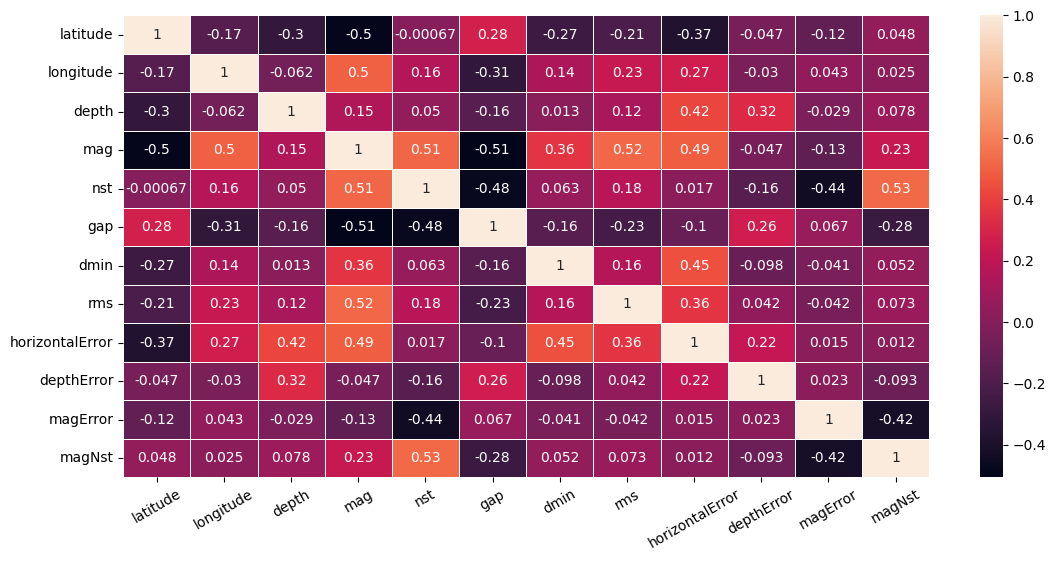

In [10]:
plt.figure(figsize=(13, 6))
sns.heatmap(data.corr(),annot=True, linewidths=.5)
plt.xticks(rotation=30)
plt.show()

In [11]:
fig = px.histogram(data, x="mag")
fig.show()

In [12]:
fig = px.box(data, x="mag")
fig.update_layout(width=1200,height=500)
fig.show()

In [13]:
depth_count=data[data.depth<50]

In [14]:
fig = px.histogram(depth_count, x="depth")
fig.show()

In [15]:
fig = px.box(depth_count, x="depth")
fig.update_layout(width=1200,height=500)
fig.show()

In [16]:
data['date'] = pd.DatetimeIndex(data['time']).date
ek_by_day = data.groupby('date').size()
b=data.groupby('date')
c=b['mag'].max()
d=b['mag'].min()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=c.index, y=c.values, name="Max Magnitude",mode='lines+markers'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=d.index, y=d.values, name="Min Magnitude",mode='lines+markers'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=ek_by_day.index, y=ek_by_day.values, name="Number of Earthquakes",mode='lines+markers'),
    secondary_y=True,
)


fig.update_xaxes(title_text="Date")


fig.update_yaxes(title_text="Magnitude", secondary_y=False)
fig.update_yaxes(title_text="Number of Earthquakes", secondary_y=True)

fig.show()

In [17]:
fig=px.scatter(x=data['longitude'],y=data['latitude'])
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.update_traces(opacity=0.1)
fig.show()

In [18]:
fig=px.scatter_geo(data, lat='latitude', lon='longitude',opacity=0.1)
fig.update_geos(visible=False,showcountries=True, countrycolor="Black")
fig.update_layout(width=1200,height=500)
fig.show()

In [19]:
volcano_data=pd.read_csv('/content/drive/MyDrive/DATA MINING/volcanoes.csv')
volcano_data

Search Parameters  Volcano Number           Volcano Name  \
0                   []             NaN                    NaN   
1                  NaN        250010.0      St. Andrew Strait   
2                  NaN        250020.0                 Baluan   
3                  NaN        250030.0   Central Bismarck Sea   
4                  NaN             NaN    Dacht-I-Navar Group   
...                ...             ...                    ...   
1600               NaN        360010.0                   Saba   
1601               NaN             NaN                Unnamed   
1602               NaN        360030.0               Liamuiga   
1603               NaN        360140.0               Qualibou   
1604               NaN        360150.0  Soufriere St. Vincent   

                           Country              Location  Latitude  Longitude  \
0                              NaN                   NaN       NaN        NaN   
1                 Papua New Guinea  Admiralty Is-SW Paci     -2.38     147.35   
2                    United States  Admiralty Is-SW Paci     -2.57     147.28   
3                    United States  Admiralty Is-SW Paci     -3.03     147.78   
4                      Afghanistan           Afghanistan     33.95      67.92   
...                            ...                   ...       ...        ...   
1600                   Netherlands              W Indies     17.63     -63.23   
1601                   Netherlands              W Indies     16.13     -61.28   
1602             St. Kitts & Nevis              W Indies     17.37     -62.80   
1603                     St. Lucia              W Indies     13.83     -61.05   
1604  St. Vincent & the Grenadines              W Indies     13.33     -61.18   

      Elevation (m)               Type       Status Last Known Eruption  
0               NaN                NaN          NaN                 NaN  
1             270.0    Complex volcano   Historical                  D2  
2             254.0      Stratovolcano     Holocene                   U  
3           -1300.0  Submarine volcano  Hydrophonic                  D1  
4            3800.0          Lava dome     Holocene                   U  
...             ...                ...          ...                 ...  
1600          887.0      Stratovolcano   Historical                  D5  
1601           -7.0  Submarine volcano   Historical                  D3  
1602         1156.0      Stratovolcano  Radiocarbon                  D6  
1603          777.0            Caldera   Historical                  D4  
1604         1220.0      Stratovolcano   Historical                  D1  

[1605 rows x 11 columns]

In [20]:
new_volcano_data=volcano_data[['Latitude','Longitude']]
new_volcano_data['type']='volcano'
new_e_d=data[['latitude','longitude']]
new_e_d.rename(columns = {'latitude':'Latitude', 'longitude':'Longitude'}, inplace = True)
new_e_d['type']='earthquake'
frames = [new_e_d, new_volcano_data]
result = pd.concat(frames)

In [21]:
fig=px.scatter_geo(result, lat='Latitude', lon='Longitude',color="type")
fig.update_geos(visible=False,showcountries=True, countrycolor="Black")
fig.update_layout(width=1200,height=500)
fig.show()

In [22]:
tectonic_plates = pd.read_csv("/content/drive/MyDrive/DATA MINING/all.csv" )
tectonic_plates.head()

plate     lat      lon
0    am  30.754  132.824
1    am  30.970  132.965
2    am  31.216  133.197
3    am  31.515  133.500
4    am  31.882  134.042

In [23]:
new_data=data[data.mag>5]
tectonic = folium.Map([42 ,29], zoom_start=3,width="%100",height="%100")

plates = list(tectonic_plates["plate"].unique())
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, color="red", fill=False, ).add_to(tectonic)

for i in range(0,new_data.shape[0]):
   folium.Circle(
      location=[new_data.iloc[i]['latitude'], new_data.iloc[i]['longitude']],
      radius=10**4,
      color='blue',
      popup='Magnitude:'+str(new_data.iloc[i]['mag'])+' Depth:'+str(new_data.iloc[i]['depth']),
      fill=True,
      fill_color='blue'
   ).add_to(tectonic)

tectonic

In [24]:
fig = Figure(width=1200, height=500)
m = folium.Map([37 ,35], zoom_start=2)
location=data[["latitude","longitude"]]
plugins.MarkerCluster(location).add_to(m)

for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, color="red", fill=False, ).add_to(m)

fig.add_child(m)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
fig = px.density_mapbox(data, lat="latitude", lon="longitude", mapbox_style="open-street-map",
                       z='mag', animation_frame = 'date', zoom = 0.5, radius = 10,height=600)
fig.show()

In [26]:
fig = go.Figure()

name_of_column=['horizontalError', 'magError', 'depthError']


for column in name_of_column:
  fig.add_trace(
        go.Densitymapbox(lat=data.latitude, lon=data.longitude, z=data[column],
                                 radius=10)
    )

fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'horizontalError',
                  method = 'update',
                  args = [{'visible': [True, False,False]},
                          {'title': 'horizontalError',
                           'showlegend':True}]),
             dict(label = 'magError',
                  method = 'update',
                  args = [{'visible': [False, True,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'magError',
                           'showlegend':True}]),
             dict(label = 'depthError',
                  method = 'update',
                  args = [{'visible': [False, False, True]}, # the index of True aligns with the indices of plot traces
                          {'title': 'depthError',
                           'showlegend':True}])
            ])
        )
    ])

fig.show()

In [27]:
figure(figsize=(7,7))
a = data['status'].value_counts()
fig = px.pie(data, values=a, names=a.index, title='Status of Seismic Stations')
fig.update_layout(width=500,height=400)
fig.show()

<Figure size 700x700 with 0 Axes>

In [28]:
istasyon=pd.read_csv('/content/drive/MyDrive/DATA MINING/sismik_istasyon.csv',usecols = ['STN','NetCode','Latitude','Longitude'])
istasyon

STN NetCode  Latitude  Longitude
0     ADVT      KO   40.4332    29.7383
1     ADVT      KO   40.4332    29.7383
2     ADVT      KO   40.4332    29.7383
3     ADVT      KO   40.4332    29.7383
4     ADVT      KO   40.4332    29.7383
...    ...     ...       ...        ...
2317   BUY      TK   40.8525    29.1175
2318   BUY      TK   40.8525    29.1175
2319   BUY      TK   40.8525    29.1175
2320   BUY      TK   40.8525    29.1175
2321   BUY      TK   40.8525    29.1175

[2322 rows x 4 columns]

In [29]:
fig = Figure(width=800, height=500)
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
location=istasyon[["Latitude","Longitude"]]
plugins.MarkerCluster(location).add_to(m)
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, color="red", fill=False, ).add_to(m)
fig.add_child(m)

In [30]:
tsunami=pd.read_csv('/content/drive/MyDrive/DATA MINING/tsunami.csv')
tsunami=data = tsunami.drop(tsunami.index[range(9)])
tsunami=tsunami.drop(labels=['Search Parameters'], axis=1)
tsunami

Year    Mo    Dy    Hr    Mn   Sec  Tsunami Event Validity  \
9   2022.0   6.0  29.0  14.0  15.0   NaN                     0.0   
10  2022.0   7.0  27.0   0.0  43.0  24.0                     4.0   
11  2022.0   9.0  19.0  18.0   5.0   6.0                     4.0   
12  2022.0   9.0  22.0   6.0  16.0   9.0                     2.0   
13  2022.0  10.0   9.0   7.0  23.0   NaN                     4.0   
14  2022.0  11.0  11.0  10.0  48.0  45.0                     4.0   
15  2022.0  11.0  22.0   2.0   3.0   7.0                     4.0   
16  2022.0  11.0  30.0  10.0  48.0   0.0                     0.0   
17  2022.0  12.0   4.0   NaN   NaN   NaN                     4.0   
18  2023.0   1.0   9.0  17.0  47.0  35.0                     4.0   
19  2023.0   2.0   6.0   1.0  17.0  35.0                     4.0   
20  2023.0   3.0  16.0   0.0  56.0   2.0                     4.0   

    Tsunami Cause Code  Earthquake Magnitude     Vol  More Info  Deposits  \
9                  8.0                   NaN     NaN        NaN       0.0   
10                 1.0                   7.0     NaN        NaN       0.0   
11                 1.0                   7.6     NaN        NaN       0.0   
12                 1.0                   6.8     NaN        NaN       0.0   
13                 6.0                   NaN  7557.0        NaN       0.0   
14                 1.0                   7.3     NaN        NaN       0.0   
15                 1.0                   7.0     NaN        NaN       0.0   
16                 1.0                   5.4     NaN        NaN       0.0   
17                 6.0                   NaN  7558.0        NaN       0.0   
18                 1.0                   7.6     NaN        NaN       0.0   
19                 1.0                   7.8     NaN        NaN       0.0   
20                 1.0                   7.0     NaN        NaN       0.0   

             Country                      Location Name  Latitude  Longitude  \
9              CHILE              TODOS LOS SANTOS LAKE   -41.142    -72.396   
10       PHILIPPINES                    N. LUZON ISLAND    17.560    120.801   
11            MEXICO                             MEXICO    18.367   -103.252   
12            MEXICO                          S. MEXICO    18.308   -102.923   
13             ITALY                   STROMBOLI ISLAND    38.789     15.213   
14             TONGA                      TONGA ISLANDS   -19.318   -172.100   
15   SOLOMON ISLANDS                    SOLOMON ISLANDS    -9.812    159.596   
16       NEW ZEALAND           LAKE TAUPO, NORTH ISLAND   -38.808    175.906   
17             ITALY                   STROMBOLI ISLAND    38.789     15.213   
18         INDONESIA                       SOUTH MALUKU    -7.049    130.038   
19            TURKEY                 GULF OF ISKENDERUN    37.166     37.042   
20  KERMADEC ISLANDS  SE RAOUL ISLAND, KERMADEC ISLANDS   -30.115   -176.112   

    Maximum Water Height (m)  Number of Runups  Tsunami Magnitude (Abe)  \
9                       0.80               1.0                      NaN   
10                      0.08               1.0                      NaN   
11                      0.79              14.0                      NaN   
12                      0.09               3.0                      NaN   
13                      0.04               2.0                      NaN   
14                      0.12               4.0                      NaN   
15                      0.03               1.0                      NaN   
16                      1.00               4.0                      NaN   
17                      0.75               3.0                      NaN   
18                      0.09               2.0                      NaN   
19                      0.25               5.0                      NaN   
20                      0.11               2.0                      NaN   

    Tsunami Magnitude (Iida)  Tsunami Intensity  Deaths  Death Description  \
9                       

In [31]:
map_ = folium.Map(location=[0,0], tiles='openstreetmap', zoom_start=2)

for i in range(0,tsunami.shape[0]):
   folium.Marker(
      location=[tsunami.iloc[i]['Latitude'], tsunami.iloc[i]['Longitude']],
      popup='Max water height(m):'+str(tsunami.iloc[i]['Maximum Water Height (m)'])+' Earthquake Magnitude:'+str(tsunami.iloc[i]['Earthquake Magnitude']),
      icon=folium.Icon(color="blue", icon="tint")
   ).add_to(map_)
map_